

---


**<center>Pandit Deendayal Energy University**<br>
**School of Technology**<br>
**Machine Learning Lab (20CP401P)**<br>
**B.Tech-Computer Science & Engineering (Sem-VII)**<br>


Name: Mire Kishorkumar Patel<br>
Roll No.: 19BCP080<br>
Branch: Computer Science & Engineering<br>

Lab 6 Assignment<br>
Perform handwritten digit classification using SVM and neural network model


---


# **MACHINE LEARNING LAB - 6: Perform handwritten digit classification using SVM and neural network model**

**• PROBLEM STATEMENT : Perform handwritten digit classification using SVM and neural network model**

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Load the data**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [ ]:
!kaggle competitions download -c digit-recognizer
!unzip \*.zip && rm *.zip

100% 15.3M/15.3M [00:01<00:00, 22.0MB/s]
100% 15.3M/15.3M [00:01<00:00, 12.7MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = pd.read_csv("./train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df.drop('label', axis=1).values
y = df['label'].values

**Exercise 1: Perform handwritten digit classification using Support Vector Machine (SVM) model. Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs. Measure model performance on test data using following metrics: accuracy, confusion matrix, precision, recall and F1 Score.**


**Splitting data into Train and test sets with Stratified Sampling using train_test_split()**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state = 42)

In [ ]:
parameters = {'kernel':['linear', 'rbf'], 'gamma':['scale', 'auto']}

grid = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=4, verbose=2, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([ 3.87034833,  7.82818246,  3.8166765 , 38.06630796]),
 'std_fit_time': array([0.05244008, 0.92801575, 0.0399876 , 0.3319755 ]),
 'mean_score_time': array([ 1.92691559,  7.77914685,  1.89461887, 20.80774134]),
 'std_score_time': array([0.05722675, 0.20659628, 0.03247399, 0.46351193]),
 'param_gamma': masked_array(data=['scale', 'scale', 'auto', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gamma': 'scale', 'kernel': 'linear'},
  {'gamma': 'scale', 'kernel': 'rbf'},
  {'gamma': 'auto', 'kernel': 'linear'},
  {'gamma': 'auto', 'kernel': 'rbf'}],
 'split0_test_score': array([0.90666667, 0.94952381, 0.90666667, 0.11047619]),
 'split1_test_score': array([0.90142857, 0.9547619 , 0.90142857, 0.11047619]),
 'split2_test_scor

**Plotting Graphs CV-accuracy vs Hyperparameters**

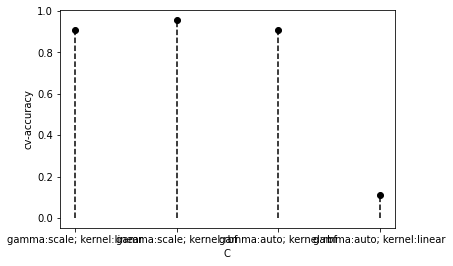

In [ ]:
C_vals = ['gamma:scale; kernel:linear', 'gamma:scale; kernel:rbf', 'gamma:auto; kernel:rbf', 'gamma:auto; kernel:linear']

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
# plt.ylim(0.85,.95)
plt.xticks(C_vals)
plt.show()















**Plotting Graphs train-accuracy vs Hyperparameters**

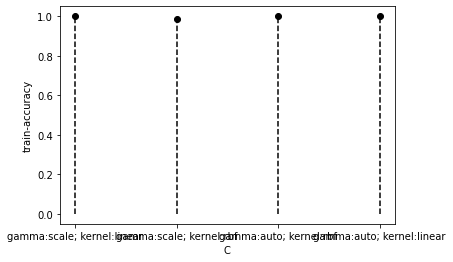

In [ ]:
plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
# plt.ylim(0.9,1.00)
plt.xticks(C_vals)
plt.show()

In [ ]:
model = SVC(gamma='scale', kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[3296    0    3    1    9    6   10    2    5    2]
 [   0 3711   17    6    4    3    5    7    8    3]
 [  16   11 3228   17   24    6   21   30   23    4]
 [   4   12   45 3267    0   59    9   21   57   19]
 [   5   11   12    0 3106    1   14    5    6   99]
 [  11    4    6   44    8 2872   51    3   16    8]
 [  27    8    9    0   16   16 3207    0    5    0]
 [   4   17   28    7   24    2    0 3337    7   46]
 [   8   17   12   32   16   34   17    6 3091   20]
 [  10   12    4   50   52   10    1   60   23 3112]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3334
           1       0.98      0.99      0.98      3764
           2       0.96      0.96      0.96      3380
           3       0.95      0.94      0.94      3493
           4       0.95      0.95      0.95      3259
           5       0.95      0.95      0.95      3023
           6       0.96      0.98      0.97      3288
           7       0.96      0.96      0.96      3472
           8       0.95      0.95      0.95      3253
           9       0.94      0.93      0.94      3334

    accuracy                           0.96     33600
   macro avg       0.96      0.96      0.96     33600
weighted avg       0.96      0.96      0.96     33600



**Exercise 2: Perform handwritten digit classification using neural network model with single hidden layer. Plot “hyperparameter vs. train-accuracy” and “hyperparameter vs. cv-accuracy” graphs. Measure model performance on test data using following metrics: accuracy, confusion matrix, precision, recall and F1 Score.** 

In [ ]:
parameters = {'hidden_layer_sizes':[(50,), (100,)], 'learning_rate_init':[0.001, 0.0005]}

grid = GridSearchCV(MLPClassifier(), param_grid=parameters, cv=4, verbose=2, n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(50,), (100,)],
                         'learning_rate_init': [0.001, 0.0005]},
             return_train_score=True, verbose=2)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([13.08419287, 17.21354485, 11.10038102, 13.7519868 ]),
 'std_fit_time': array([2.67563848, 4.88840162, 0.99919951, 1.07321648]),
 'mean_score_time': array([0.0217061 , 0.0208745 , 0.0315581 , 0.02827233]),
 'std_score_time': array([0.00044068, 0.00028497, 0.00035018, 0.00577843]),
 'param_hidden_layer_sizes': masked_array(data=[(50,), (50,), (100,), (100,)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate_init': masked_array(data=[0.001, 0.0005, 0.001, 0.0005],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001},
  {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.0005},
  {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001},
  {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0005}],
 'split0_test_score': array([0.87      , 0.85428571, 0.89428571, 0.8752

**Plotting Graphs CV-accuracy vs Hyperparameters**

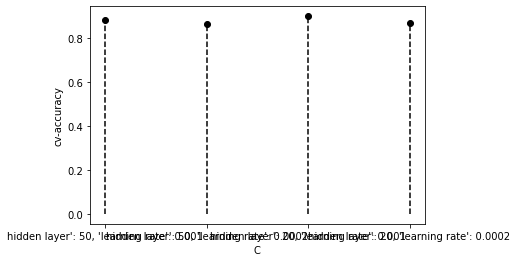

In [ ]:
C_vals = ["hidden layer': 50, 'learning rate': 0.001", 
         "hidden layer': 50, 'learning rate': 0.0002",
         "hidden layer': 20, 'learning rate': 0.001",
         "hidden layer': 20, 'learning rate': 0.0002"]

plt.xlabel("C")
plt.ylabel("cv-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_test_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_test_score'], linestyle="dashed")
# plt.ylim(0.85,.95)
plt.xticks(C_vals)
plt.show()

**Plotting Graphs train-accuracy vs Hyperparameters**

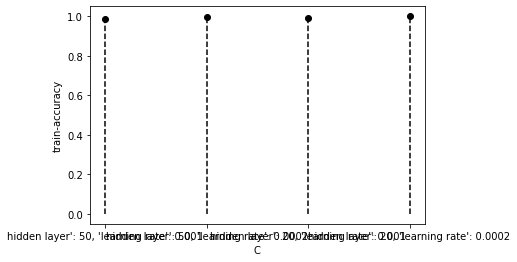

In [ ]:
plt.xlabel("C")
plt.ylabel("train-accuracy")
plt.scatter(C_vals, grid.cv_results_['mean_train_score'], color='black')
plt.vlines(C_vals, 0, grid.cv_results_['mean_train_score'], linestyle="dashed")
plt.xticks(C_vals)
plt.show()

In [ ]:
model = MLPClassifier(hidden_layer_sizes=100, learning_rate_init=0.0005)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[3149    0   24    4   16   47   38   21   30    5]
 [   1 3621   20   24   15    4    6   34   32    7]
 [  33   22 2889  113   58   12   57   81   90   25]
 [  30   24   73 2931    2  206   17   37  113   60]
 [  16   17   32   14 2872    9   41   37   42  179]
 [  44   14   13  118   31 2604   57   11   89   42]
 [  54   16   31   10   50   46 3033   12   33    3]
 [   7   21   49   35   39   10    4 3158   26  123]
 [  30   41   77  160   38   93   24   19 2707   64]
 [  28   11   19   45  135   35    3  135   38 2885]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3334
           1       0.96      0.96      0.96      3764
           2       0.90      0.85      0.87      3380
           3       0.85      0.84      0.84      3493
           4       0.88      0.88      0.88      3259
           5       0.85      0.86      0.86      3023
           6       0.92      0.92      0.92      3288
           7       0.89      0.91      0.90      3472
           8       0.85      0.83      0.84      3253
           9       0.85      0.87      0.86      3334

    accuracy                           0.89     33600
   macro avg       0.89      0.89      0.89     33600
weighted avg       0.89      0.89      0.89     33600



**Observation of the model**

We are using SVM, Neural Network and Logistic regression and the accuracy we get are as blow


*   SVM :- 96%
*   Neural Network :- 89%
* Logistic regression :- 91%

